In [43]:
import pandas as pd

df = pd.read_csv('/content/Transformed Data Set - Sheet1.csv')
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [44]:
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [45]:
df.duplicated().sum()

4

In [46]:
df = df.drop_duplicates()

In [47]:
df.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [48]:
from sklearn import set_config

set_config(transform_output='pandas')

In [49]:
import matplotlib.pyplot as plt

def plot(df):
  for col in df.columns:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(col)

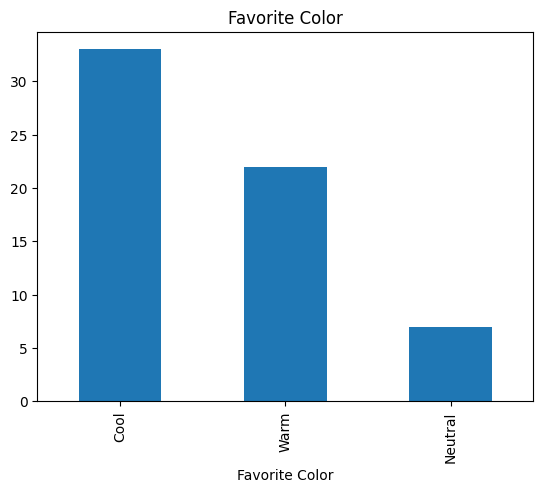

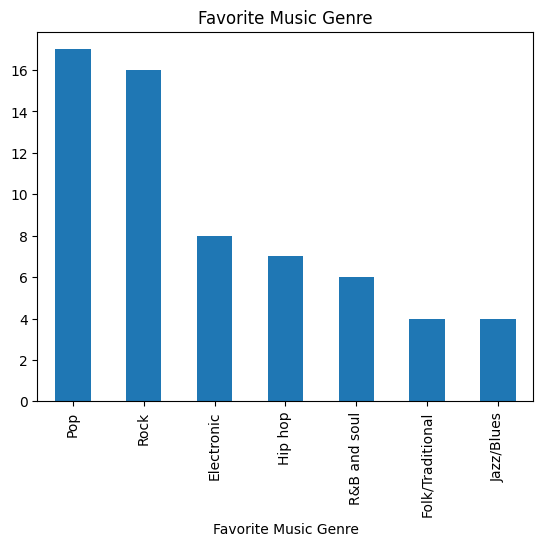

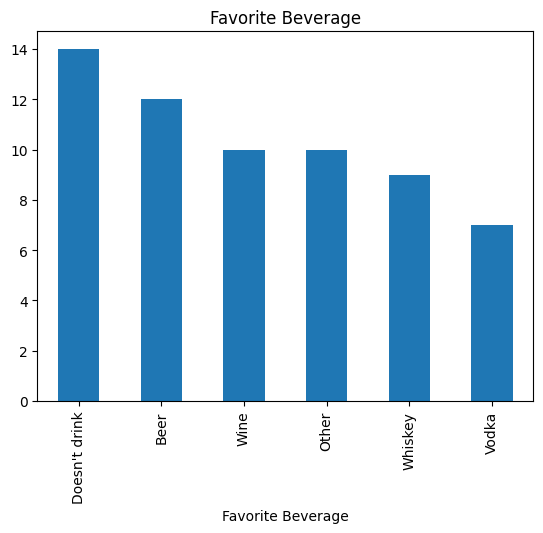

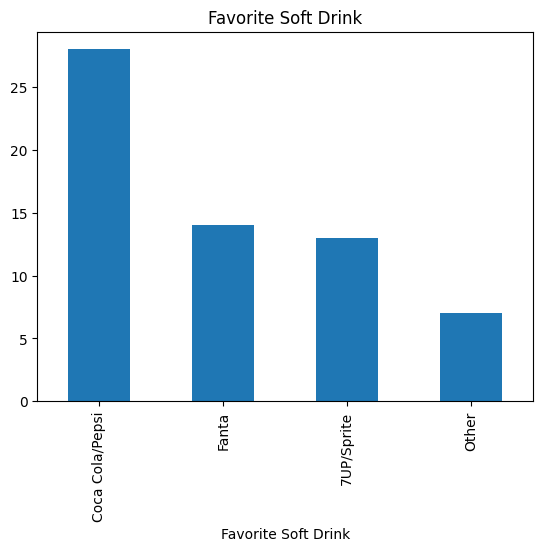

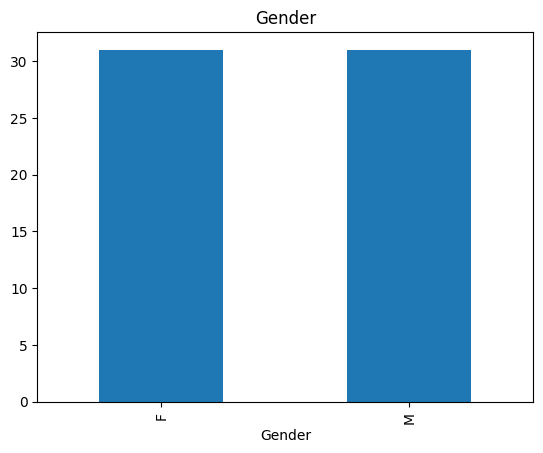

In [50]:
plot(df)

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [52]:
y = df['Gender']
X = df.drop('Gender', axis=1)
X = pd.get_dummies(X, dtype='int32')

In [53]:
X

,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Electronic,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Beer,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_7UP/Sprite,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other
0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
60,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
63,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
64,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [55]:
y = y.replace({'M': 1, 'F': 0})

In [56]:
y

0     0
1     0
2     0
3     0
4     0
     ..
59    1
60    1
63    1
64    1
65    1
Name: Gender, Length: 62, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(X.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [59]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

<Axes: >

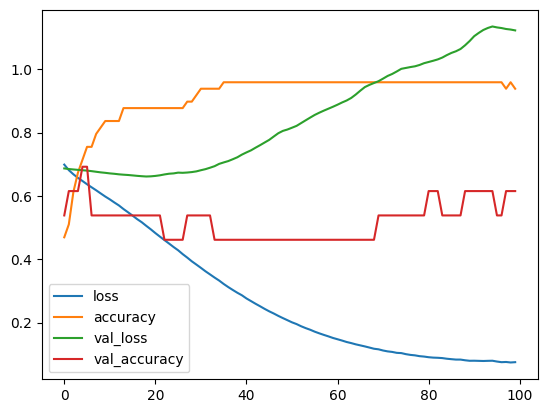

In [60]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=0)
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()

In [61]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(20,)),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [63]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])

In [65]:
history = model_1.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=0)

1/1 [==============================] - 0s 46ms/step - loss: 1.1769 - accuracy: 0.6923
Model loss on test set: 1.1768791675567627
Model accuracy on test set: 69.23%


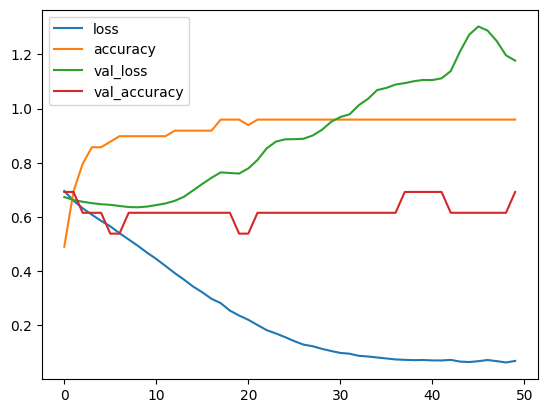

In [66]:
pd.DataFrame(history.history).plot()
loss, accuracy = model_1.evaluate(x_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")